In [ ]:
project -

India's agricultural future depends on innovation. 

This report explores how the "Future Internet" can transform the sector by fostering collaboration and empowering stakeholders with real-time data insights through a B2B platform. 

This approach aims to leverage the big data to optimize crop production.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Crop Production data.csv')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [63]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [4]:
df.shape

(246091, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df.isnull().mean()*100
#or by df.isnull().sum()/len(df)*100

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

In [9]:
df[['Area','Production']].corr()

,Area,Production
Area,1.000000,0.040587
Production,0.040587,1.000000


In [10]:
df.duplicated().sum() # NO DUPLICATES IN THE GIVEN DATA

0

In [10]:
# filling the missing values

In [11]:
# fill the production value(which is the target column also) by the mean(average) production of each crop.


In [12]:
df['Production'].isnull().sum()

3730

In [13]:
df[df['Production'].isnull()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [14]:
df.groupby('Crop')['Production'].mean()

Crop
Apple                       0.000000
Arcanut (Processed)      9641.550000
Arecanut                13229.253355
Arhar/Tur                5261.020643
Ash Gourd                   0.000000
                           ...      
Wheat                  169183.251688
Yam                         0.000000
other fibres                0.000000
other misc. pulses        138.631714
other oilseeds           8030.149512
Name: Production, Length: 124, dtype: float64

In [15]:
df['Production'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
246086    False
246087    False
246088    False
246089    False
246090    False
Name: Production, Length: 246091, dtype: bool

In [16]:
df['Production'].fillna(df.groupby('Crop')['Production'].transform('mean'),inplace=True)
# filled vales of null production by average production of each crop

In [16]:
df['Production'].isnull().sum()

0

In [17]:
df.describe()
# 1.250800e+09 -> approx 1.2 billion

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.814033e+05
std,4.952164,5.052340e+04,1.695015e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.710000e+02
75%,2010.000000,4.392000e+03,7.100000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [18]:
# handling the outliers

In [19]:
df['Area'].skew() # a right skew so using IQR distribution method

48.00127769770893

In [20]:
percentile25=df['Area'].quantile(0.25)
percentile75=df['Area'].quantile(0.75)

In [21]:
print(percentile25)
print(percentile75)

80.0
4392.0


In [22]:
IQR =percentile75-percentile25
IQR

4312.0

In [23]:
upper_limit = percentile75 + 1.5 * (IQR)
lower_limit = percentile25 - 1.5 * (IQR)

In [24]:
upper_limit

10860.0

In [25]:
lower_limit

-6388.0

In [26]:
df[df['Area']>upper_limit]# this is the outliers

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0
...,...,...,...,...,...,...,...
246017,West Bengal,PURULIA,2012,Winter,Rice,288735.00,729553.0
246033,West Bengal,PURULIA,2013,Kharif,Urad,12986.00,2877.0
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.0
246070,West Bengal,PURULIA,2014,Kharif,Urad,11493.00,3287.0


In [27]:
df[df['Area']<lower_limit] 
# it is right because the lower limit of area cannot be negative

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [28]:
new_df=df[(df['Area']<upper_limit) ]

In [29]:
new_df
#In this there is no outlier in the data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0


In [30]:
new_df.shape

(205384, 7)

In [31]:
df.shape

(246091, 7)

In [32]:
#NOW removing the outliers of production from new_df itself

In [34]:
new_df['Production'].skew() # a right skew so using IQR distribution method

49.2796908085803

In [35]:
percentile25_=new_df['Production'].quantile(0.25)
percentile75_=new_df['Production'].quantile(0.75)

In [36]:
print(percentile25_)
print(percentile75_)

55.0
2225.0


In [37]:
IQR_ =percentile75_-percentile25_
IQR_

2170.0

In [38]:
upper_limit_ = percentile75 + 1.5 * (IQR_)
lower_limit_ = percentile25 - 1.5 * (IQR_)

In [39]:
upper_limit_

7647.0

In [40]:
lower_limit_

-3175.0

In [41]:
new_df[new_df['Production']>upper_limit_]# this are outliers

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,1.322925e+04
81,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Kharif,Rice,10779.00,3.186300e+04
82,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Whole Year,Banana,1531.00,1.207300e+04
84,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Whole Year,Coconut,6992.00,2.390000e+07
92,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Kharif,Rice,9718.00,2.703300e+04
...,...,...,...,...,...,...,...
246043,West Bengal,PURULIA,2013,Rabi,Potato,1726.00,4.370300e+04
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.00,7.948000e+03
246056,West Bengal,PURULIA,2014,Autumn,Maize,6317.00,1.333700e+04
246080,West Bengal,PURULIA,2014,Rabi,Potato,477.00,9.995000e+03


In [42]:
new_df[new_df['Production']<lower_limit_]
# correct because produxtion cannot be negative

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [43]:
new_df1 =new_df[(new_df['Production']<upper_limit_)]

In [44]:
new_df1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.0,3663.0
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0


In [45]:
new_df1.to_excel('crop.xlsx')  #(so that dashboard can be created )

In [46]:
new_df1.shape

(182503, 7)

In [47]:
# changing the datatype
new_df1.dtypes


State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [48]:
new_df1['Crop_Year'].nunique() # so it can be convereted into category so we can convert the dtype in object

19

In [49]:
new_df1['Crop_Year']=new_df1['Crop_Year'].astype('object')

C:\Users\sahus\AppData\Local\Temp\ipykernel_24272\4039603219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Crop_Year']=new_df1['Crop_Year'].astype('object')


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [52]:
# checking for the duplicated
new_df1.duplicated().sum()  
#no duplicated value in the new dataframe

0

In [53]:
3 things done:-
    missing value imputation in production column
    removal of outliers in area and production column
    checked the duplicated vvalue (no duplicated value here)
    

SyntaxError: invalid syntax (1211634603.py, line 1)

######  identify categorical variables and their unique values

In [54]:
new_df1['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [55]:
new_df1['State_Name'].nunique()

33

In [56]:
new_df1['District_Name'].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [56]:
new_df1['District_Name'].nunique()

646

In [57]:
new_df1['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=object)

In [58]:
new_df1['Crop_Year'].nunique()

19

In [59]:
new_df1['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [60]:
new_df1['Season'].nunique()

6

###### EDA(exploratory data analysis)
purpose is to understand the data in and out.

#doing univariate analysis , bivariate analysis and multivariate analysis.

###### UNIVARIATE ANALYSIS (in numerical as well as categorical columns)

In [62]:
# Categorical

In [63]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

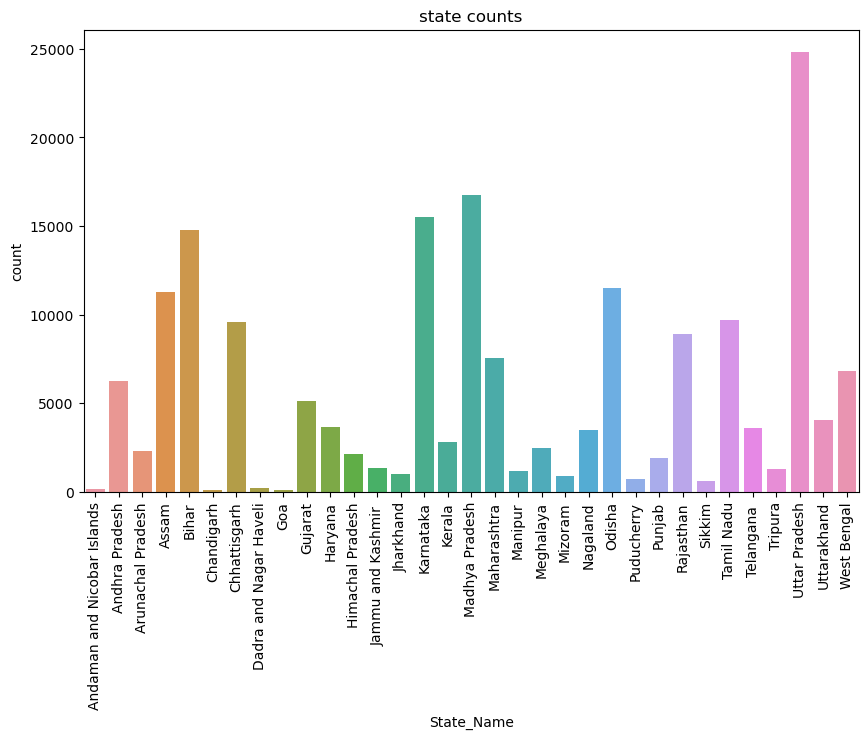

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_df1 , x='State_Name')
plt.title('state counts')
plt.xticks(rotation=90)

<Axes: xlabel='State_Name'>

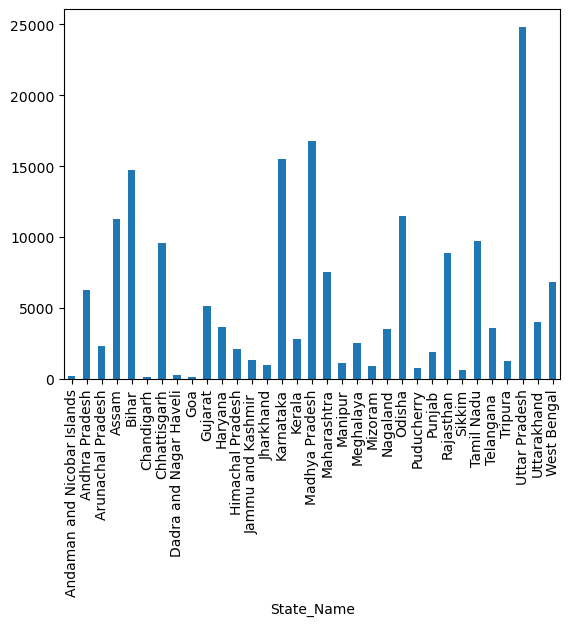

In [65]:
# or
# state name   

new_df1.groupby('State_Name')['State_Name'].value_counts().plot(kind='bar')
# according to 'District_Name' the graph is not good at all. 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

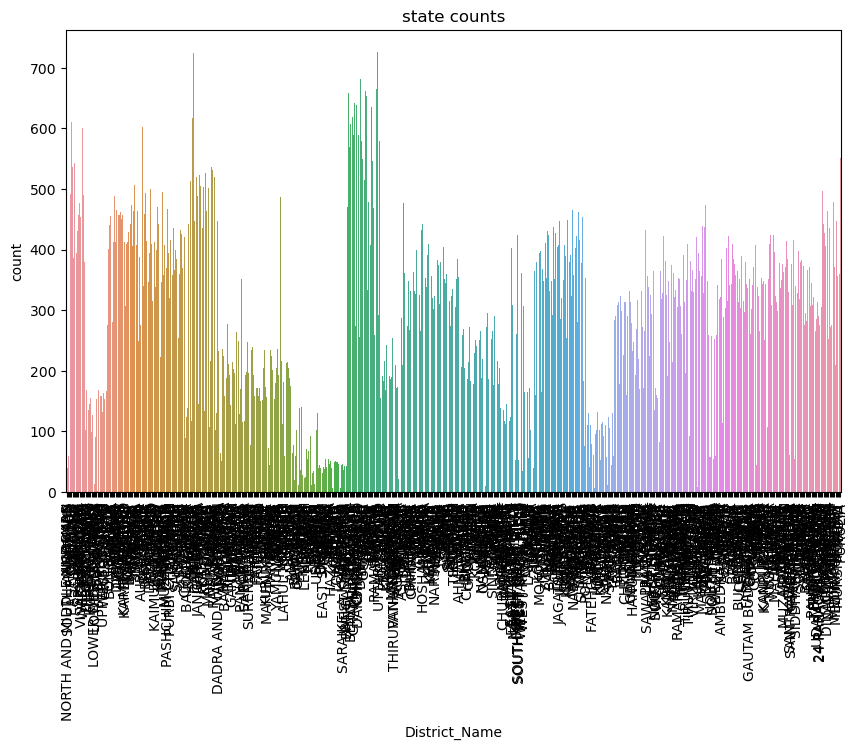

In [66]:
# district name
plt.figure(figsize=(10,6))
sns.countplot(data=new_df1 , x='District_Name')
plt.title('state counts')
plt.xticks(rotation=90)

<Axes: xlabel='District_Name'>

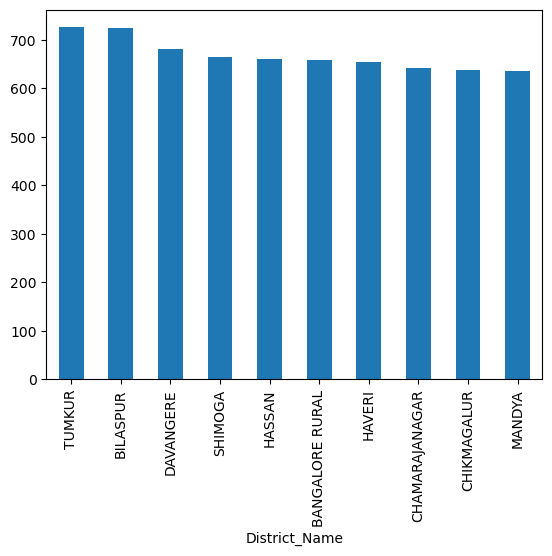

In [67]:
# for top 10
#the graph is not clear so we wiil take first 10 and last 10 values
new_df1.groupby('District_Name')['District_Name'].value_counts().sort_values(ascending =False).head(10).plot(kind='bar')


<Axes: xlabel='District_Name'>

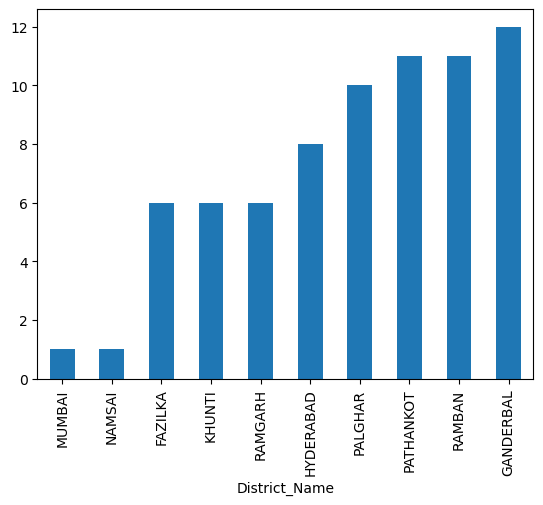

In [68]:
# for last 10
#the graph is not clear so we wel take first 10 and last 10 values
new_df1.groupby('District_Name')['District_Name'].value_counts().sort_values().head(10).plot(kind='bar')


In [69]:
Mumbai has the least count (least crop production)
Tumaku has the highest count (high crop production)

SyntaxError: invalid syntax (3624152147.py, line 1)

<Axes: xlabel='Crop_Year'>

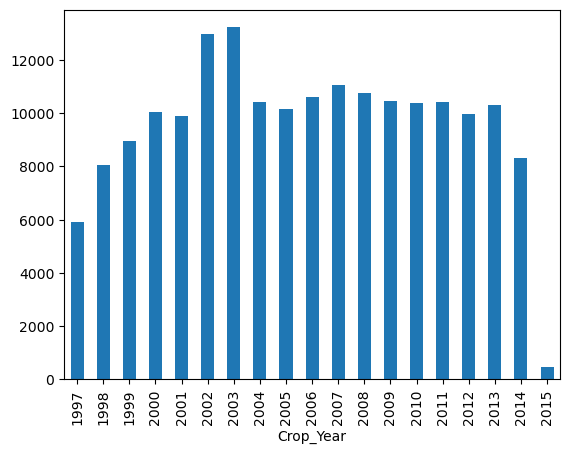

In [57]:
# Crop year
new_df1.groupby('Crop_Year')['Crop_Year'].value_counts().plot(kind='bar')


<Axes: xlabel='Season'>

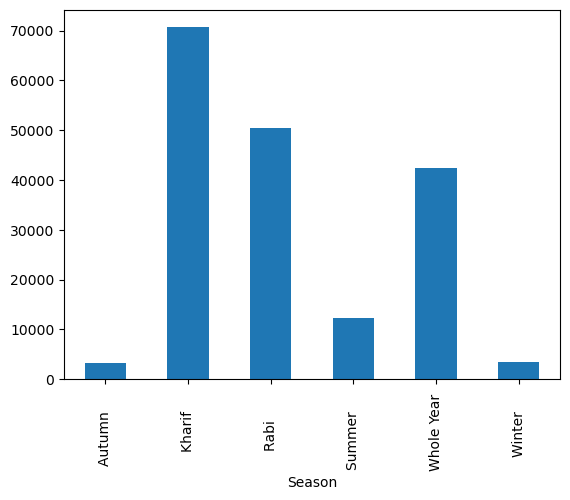

In [58]:
# Season
new_df1.groupby('Season')['Season'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

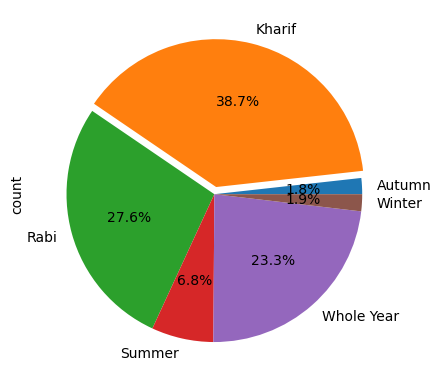

In [235]:

new_df1.groupby('Season')['Season'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0,0.05,0,0,0,0])

<Axes: xlabel='Crop'>

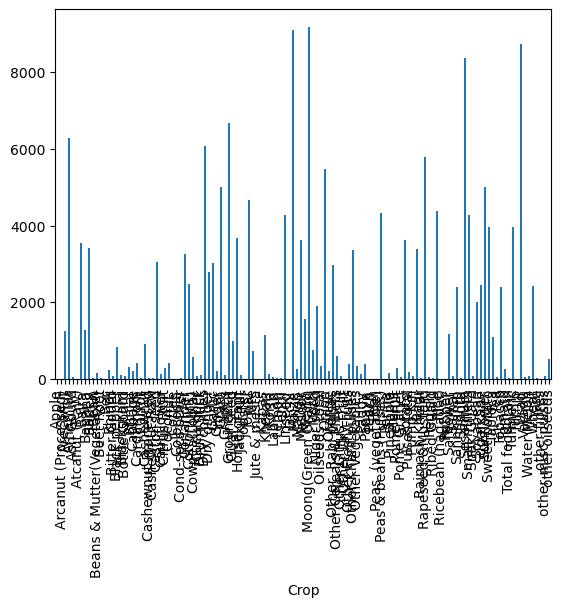

In [207]:
# Crop
new_df1.groupby('Crop')['Crop'].value_counts().plot(kind='bar')

<Axes: xlabel='Crop'>

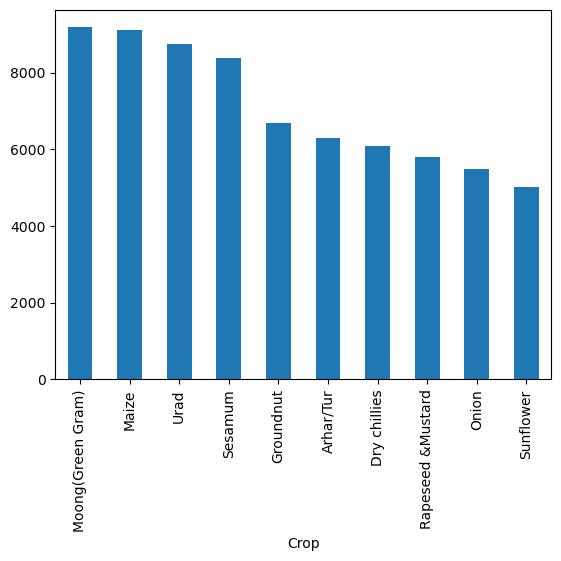

In [208]:
#top 10
#the graph is not clear so we wiil take first 10 and last 10 values
# Crop
new_df1.groupby('Crop')['Crop'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Crop'>

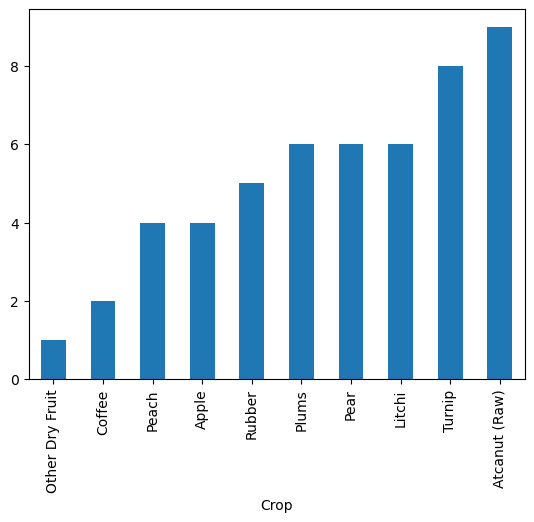

In [209]:
#last 10
#the graph is not clear so we wiil take first 10 and last 10 values
# Crop
new_df1.groupby('Crop')['Crop'].value_counts().sort_values().head(10).plot(kind='bar')

In [59]:
###### univariate analysis on numerical column 

# -> boxplot
# -> histplot
# -> kdeplot

SyntaxError: invalid syntax (3685443121.py, line 3)

<Axes: xlabel='Area', ylabel='Count'>

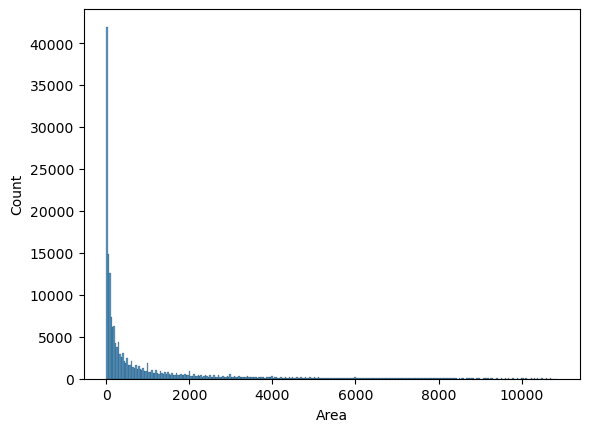

In [60]:
# Area
sns.histplot(data=new_df1 , x='Area')

<Axes: xlabel='Area', ylabel='Density'>

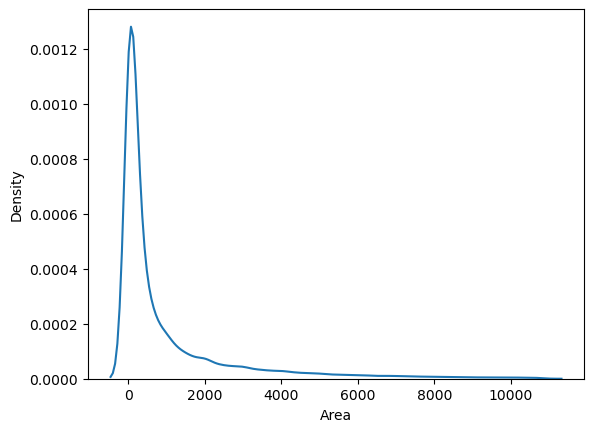

In [70]:
sns.kdeplot(data=new_df1 , x='Area')
# the data is highly sckewed it may be because in differnet state their can be differnet distribution of agricultural land

<Axes: xlabel='Area'>

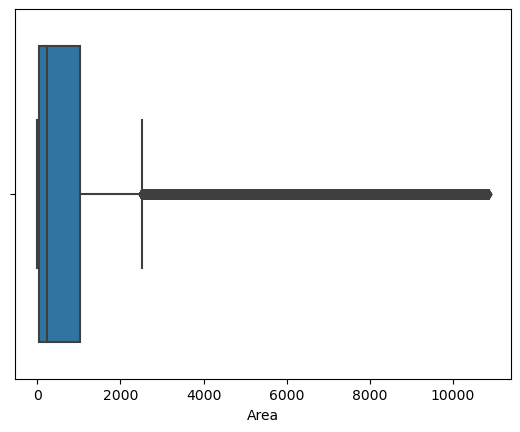

In [71]:
sns.boxplot(data=new_df1 , x='Area')

<Axes: xlabel='Production', ylabel='Count'>

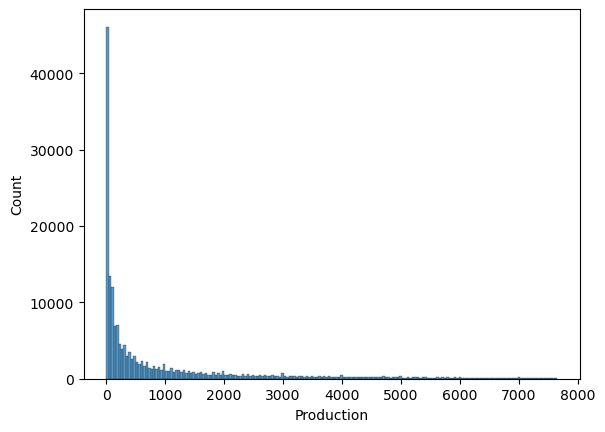

In [72]:
#Production
sns.histplot(data=new_df1 , x='Production')

<Axes: xlabel='Production', ylabel='Density'>

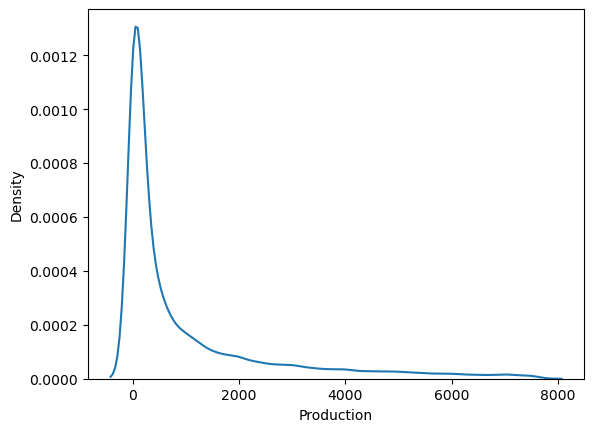

In [73]:
sns.kdeplot(data=new_df1 , x='Production')
# the data is highly sckewed it may be because in differnet state their can be differnet distribution of agricultural land and differenrt state produce different crops in abundance

In [246]:
new_df1.describe()

,Crop_Year,Area,Production
count,182503.000000,182503.000000,182503.000000
mean,2005.714323,987.681014,1001.743937
std,4.919389,1745.581891,1569.864178
min,1997.000000,0.100000,0.000000
25%,2002.000000,42.000000,40.000000
50%,2006.000000,224.000000,261.000000
75%,2010.000000,1035.000000,1225.658039
max,2015.000000,10854.000000,7646.000000


<Axes: xlabel='Production'>

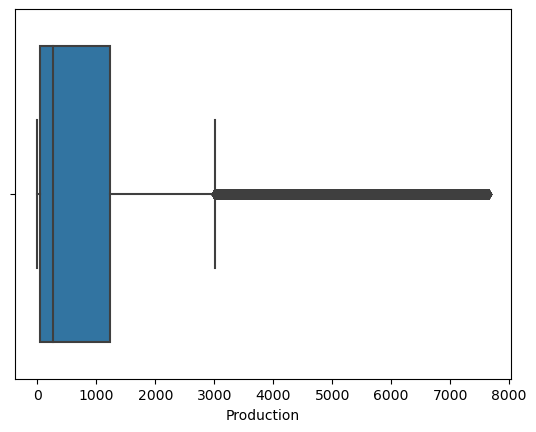

In [75]:
sns.boxplot(data=new_df1 , x='Production')

In [76]:
###### BIVARIATE AND MULTIVARIATE  ANALYSIS

In [77]:
2 columns -BIVARIATE analysis
more than 2 columns - MultiVARIATE analysis

SyntaxError: invalid syntax (1128887937.py, line 1)

In [78]:
data type 3 categories
numerical - numerical
numerical - categorical
categorical - categorical

SyntaxError: invalid syntax (820955663.py, line 1)

In [79]:
# numerical numerical

<Axes: xlabel='Production', ylabel='Area'>

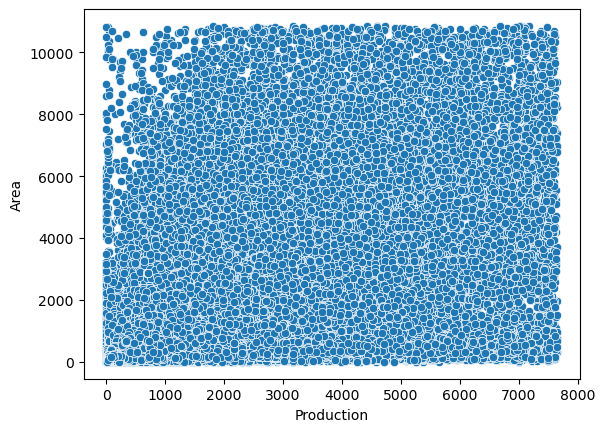

In [80]:
sns.scatterplot(data=new_df1,x='Production',y='Area')

<Axes: xlabel='Production', ylabel='Area'>

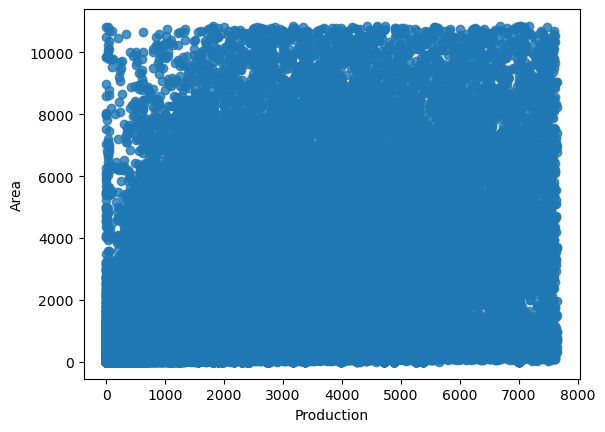

In [216]:
sns.regplot(data=new_df1,x='Production',y='Area')

In [81]:
production is  correlated with agricultural area 

SyntaxError: invalid syntax (854466802.py, line 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

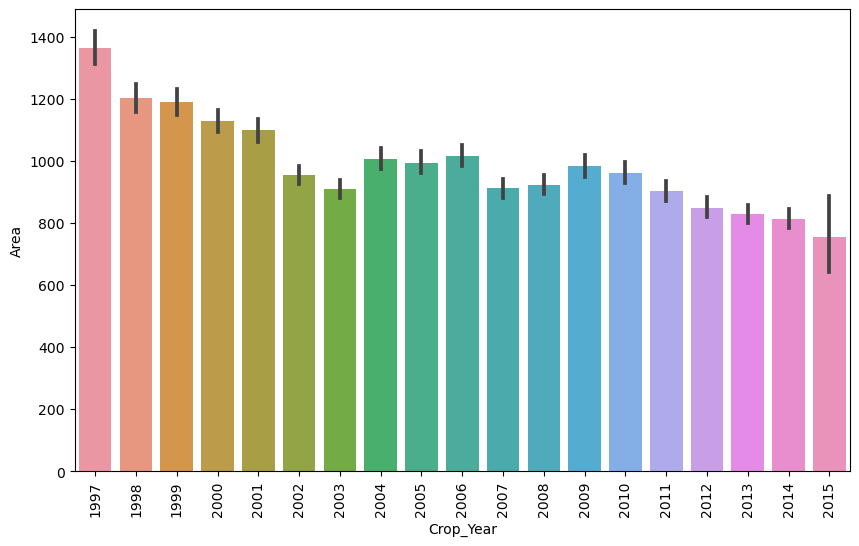

In [217]:
#Crop_Year , Area
plt.figure(figsize=(10,6))
sns.barplot(x='Crop_Year',y='Area',data=new_df1)
plt.xticks(rotation=90)

In [82]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [83]:
# numerical- categorical

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

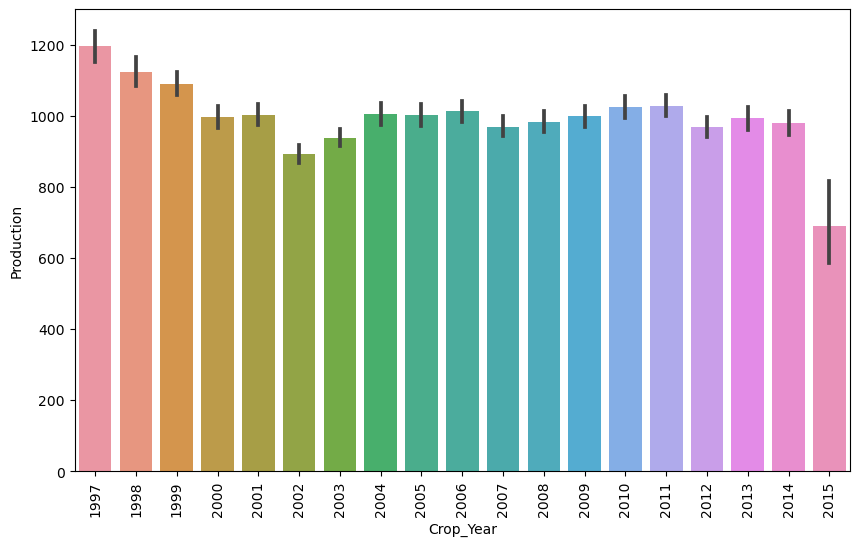

In [84]:
# Crop_Year , Production
plt.figure(figsize=(10,6))
sns.barplot(x='Crop_Year',y='Production',data=new_df1)
plt.xticks(rotation=90)

C:\Users\sahus\AppData\Local\Temp\ipykernel_19224\1337771042.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='State_Name',y='Production',data=new_df1,ci=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

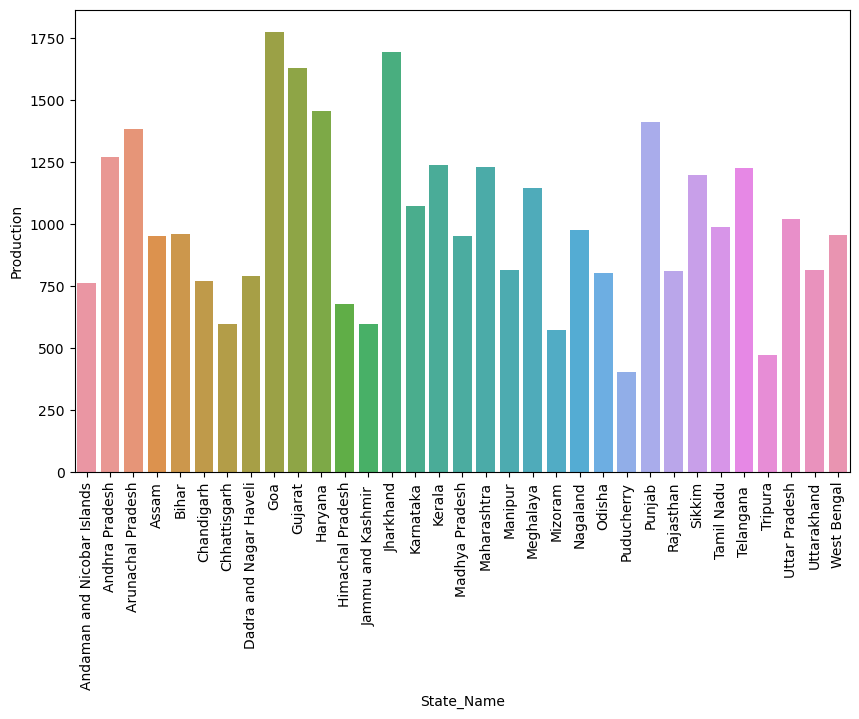

In [244]:
# Crop_Year , Production
plt.figure(figsize=(10,6))
sns.barplot(x='State_Name',y='Production',data=new_df1,ci=False)
plt.xticks(rotation=90)

In [86]:
Goa has highest production
puducherry has the lowest production

SyntaxError: invalid syntax (3127977481.py, line 1)

C:\Users\sahus\AppData\Local\Temp\ipykernel_19224\1241835703.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='State_Name',y='Area',data=new_df1,ci=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

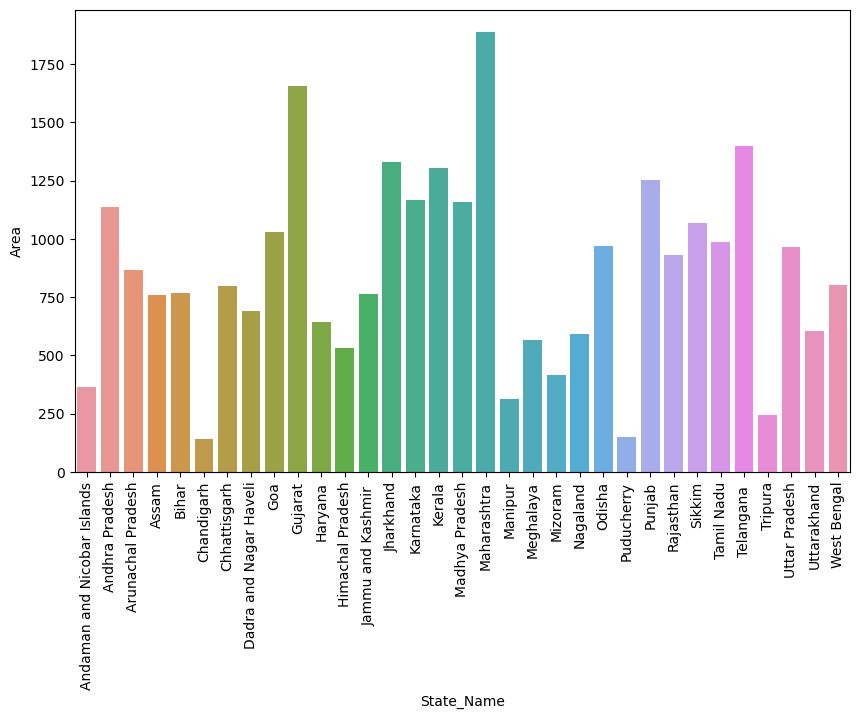

In [245]:
# State_Name , Production
plt.figure(figsize=(10,6))
sns.barplot(x='State_Name',y='Area',data=new_df1,ci=False)
plt.xticks(rotation=90)

In [ ]:
chatisgarh has lowest number of agriculture land and maharastra has maximum agricultural land

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

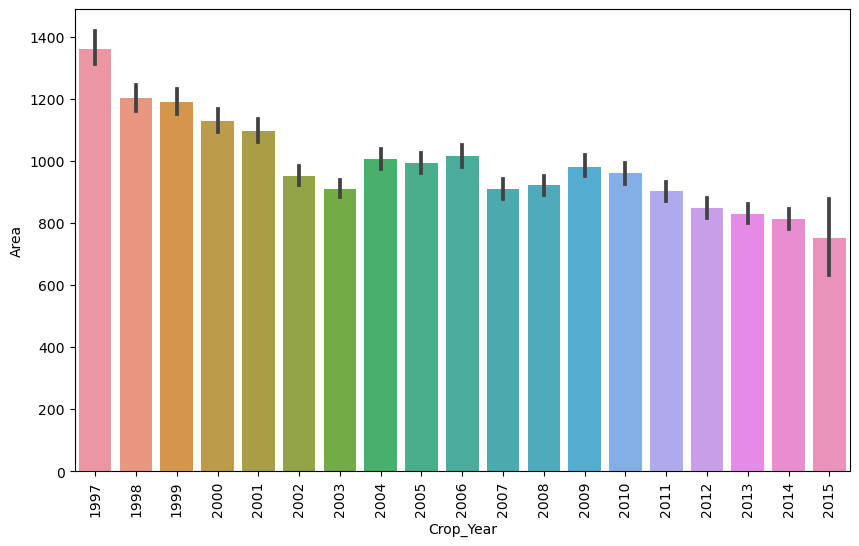

In [221]:
#Crop_Year , Area
plt.figure(figsize=(10,6))
sns.barplot(x='Crop_Year',y='Area',data=new_df1)
plt.xticks(rotation=90)

In [ ]:
Almost from 1997 to 2015 there is decrease in the area

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Kharif'),
  Text(1, 0, 'Whole Year'),
  Text(2, 0, 'Autumn'),
  Text(3, 0, 'Rabi'),
  Text(4, 0, 'Summer'),
  Text(5, 0, 'Winter')])

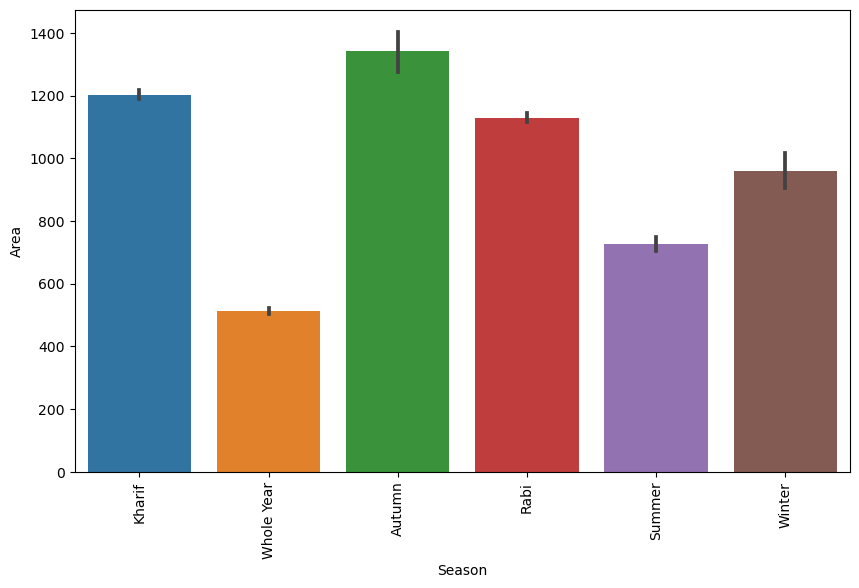

In [224]:
# season , area
plt.figure(figsize=(10,6))
sns.barplot(x='Season',y='Area',data=new_df1)
plt.xticks(rotation=90)

In [ ]:
the agricutural area is maximum in autumn

<Axes: xlabel='Season'>

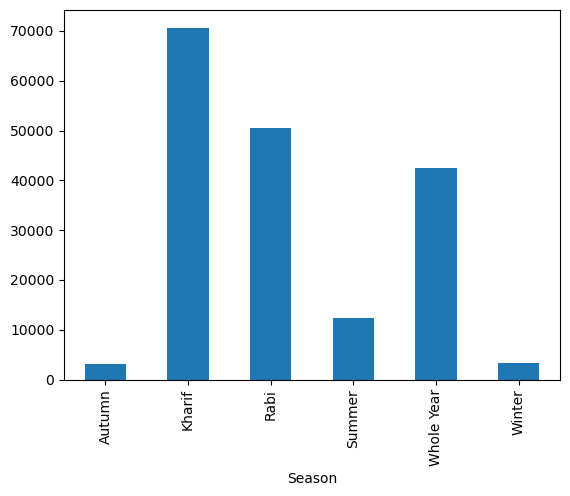

In [239]:
new_df1.groupby('Season')['Production'].count().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Kharif'),
  Text(1, 0, 'Whole Year'),
  Text(2, 0, 'Autumn'),
  Text(3, 0, 'Rabi'),
  Text(4, 0, 'Summer'),
  Text(5, 0, 'Winter')])

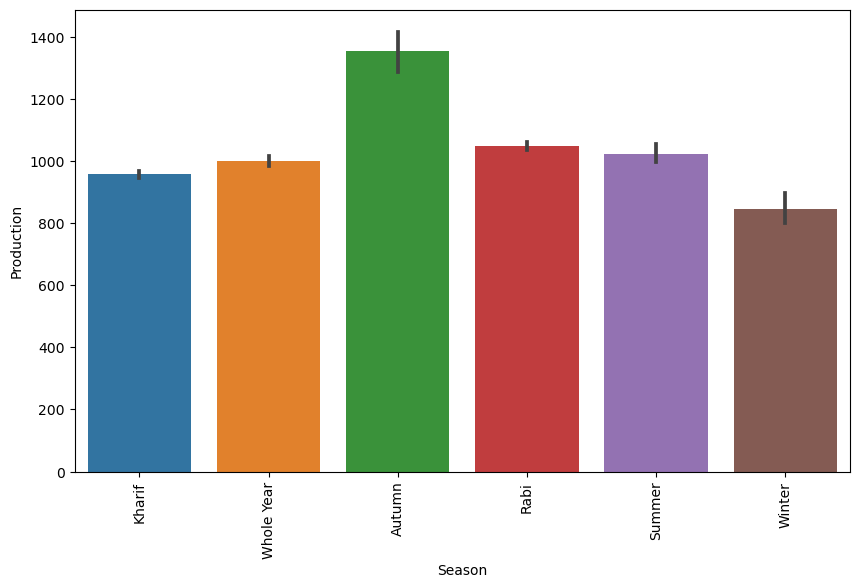

In [223]:
# season , Production
plt.figure(figsize=(10,6))
sns.barplot(x='Season',y='Production',data=new_df1)
plt.xticks(rotation=90)

In [ ]:
the production is maximum in Autumn

C:\Users\sahus\AppData\Local\Temp\ipykernel_19224\3975214871.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Crop',y='Production',data=new_df1,ci=False)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123]),
 [Text(0, 0, 'Arecanut'),
  Text(1, 0, 'Other Kharif pulses'),
  Text(2, 0, 'Rice'),
  Text(3, 0, 'Banana'),
  Text(4, 0, 'Cashewnut'),
  Text(5, 0, 'Dry ginger'),
  Text(6, 0, 'Sugarcane'),
  Text(7, 0, 'Sweet potato'),
  Text(8, 0, 'Tapioca'),
  Text(9, 0, 'Black pepper'),
  Text(10, 0, 'Dry chi

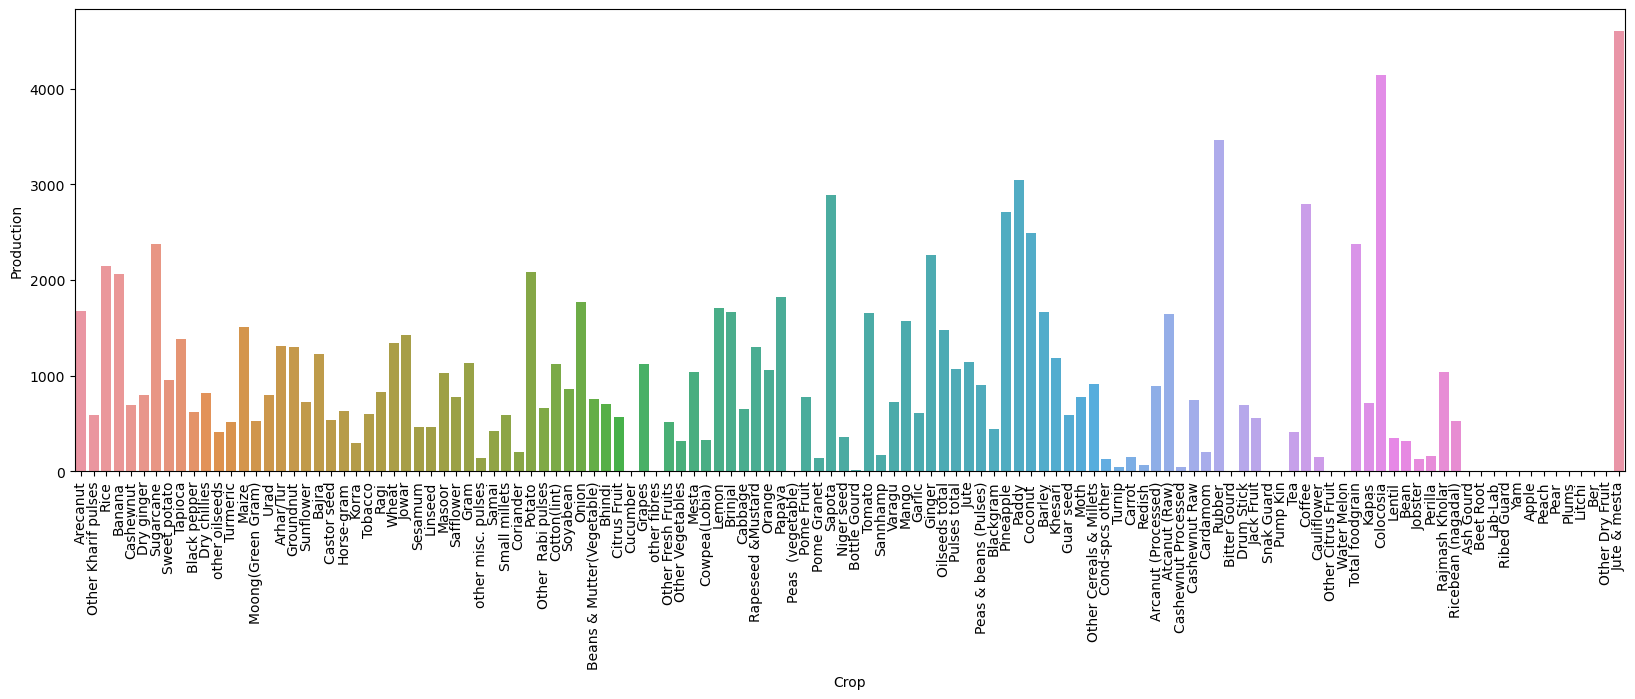

In [242]:
# crop,production
plt.figure(figsize=(20,6))
sns.barplot(x='Crop',y='Production',data=new_df1,ci=False)
plt.xticks(rotation=90)

In [ ]:
the production of jute and mesta is maximum

C:\Users\sahus\AppData\Local\Temp\ipykernel_19224\2933815951.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Crop',y='Area',data=new_df1,ci=False)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123]),
 [Text(0, 0, 'Arecanut'),
  Text(1, 0, 'Other Kharif pulses'),
  Text(2, 0, 'Rice'),
  Text(3, 0, 'Banana'),
  Text(4, 0, 'Cashewnut'),
  Text(5, 0, 'Dry ginger'),
  Text(6, 0, 'Sugarcane'),
  Text(7, 0, 'Sweet potato'),
  Text(8, 0, 'Tapioca'),
  Text(9, 0, 'Black pepper'),
  Text(10, 0, 'Dry chi

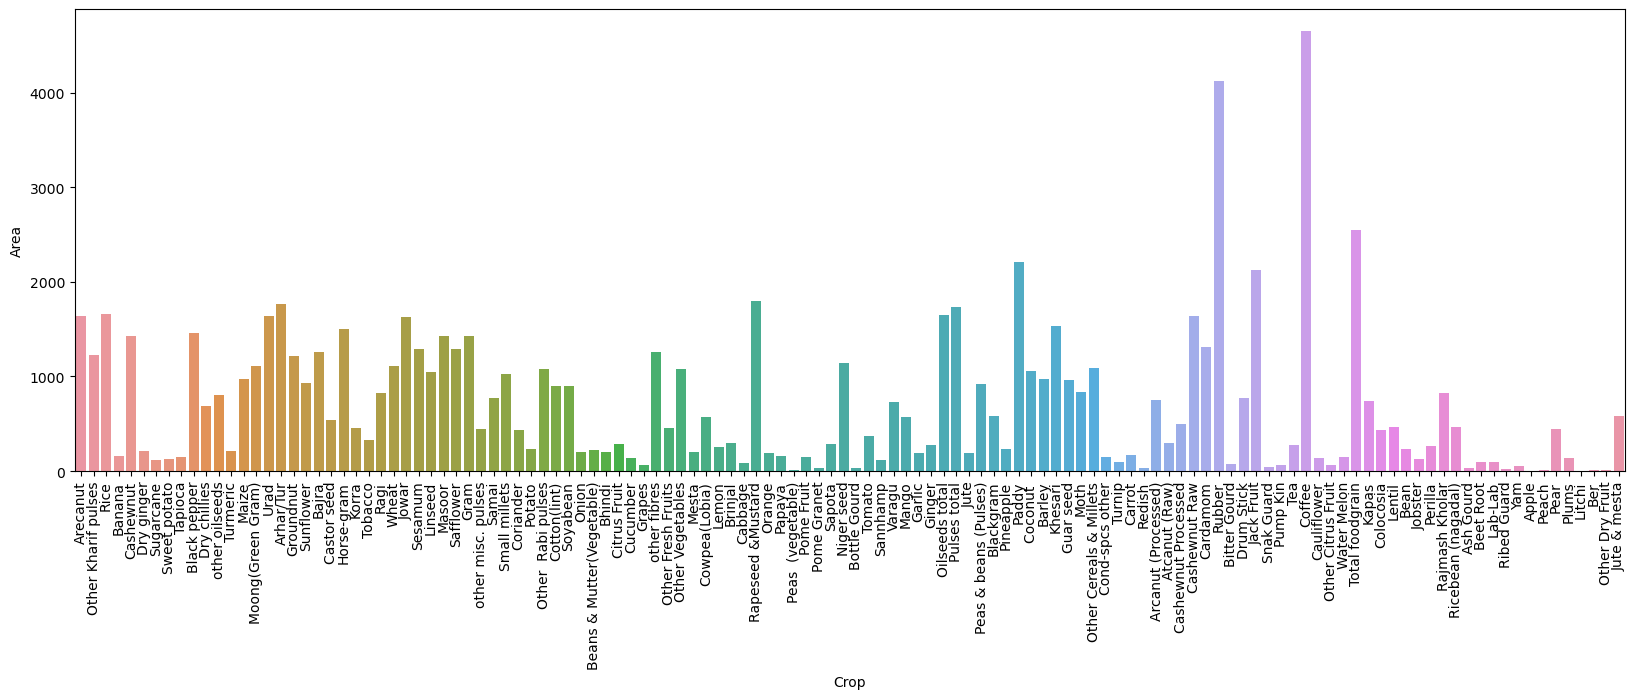

In [243]:
# crop,area

plt.figure(figsize=(20,6))
sns.barplot(x='Crop',y='Area',data=new_df1,ci=False)
plt.xticks(rotation=90)

In [ ]:
coffee(crop) has highest area

In [ ]:
other graphs

###### season wise yearly production

In [100]:
new_df1['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [93]:
new_df1.groupby(['Season','Crop_Year'])['Production'].sum().unstack()

Crop_Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Season,,,,,,,,,,,,,,,,,,,
Autumn,187949.0,2.237116e+05,7.227800e+04,6.405300e+04,9.850300e+04,1.732291e+05,1.557644e+05,2.943346e+05,2.711368e+05,2.791444e+05,3.834156e+05,2.488139e+05,2.607055e+05,3.315930e+05,2.785996e+05,2.845980e+05,3.214232e+05,3.212356e+05,80268.3
Kharif,2799854.0,3.735214e+06,3.971457e+06,4.251939e+06,4.021841e+06,3.756923e+06,4.206137e+06,3.877769e+06,3.786933e+06,3.813810e+06,3.761917e+06,3.808704e+06,3.320292e+06,4.112737e+06,3.891013e+06,3.725183e+06,3.740159e+06,3.048898e+06,26797.0
Rabi,1850100.0,2.494476e+06,2.692127e+06,2.725838e+06,2.808778e+06,2.977768e+06,2.872059e+06,2.773224e+06,2.714052e+06,3.236749e+06,3.125882e+06,3.161670e+06,2.942009e+06,3.480061e+06,3.568273e+06,3.148707e+06,3.498799e+06,2.786437e+06,3938.0
Summer,423331.0,6.345337e+05,5.383300e+05,4.283100e+05,3.757930e+05,6.015610e+05,6.146760e+05,5.738144e+05,6.475023e+05,7.407621e+05,7.962071e+05,7.067542e+05,8.554796e+05,8.131608e+05,1.006242e+06,9.002825e+05,9.708904e+05,9.268760e+05,100686.7
Whole Year,1685580.0,1.768885e+06,2.433776e+06,2.522861e+06,2.590825e+06,4.031709e+06,4.527081e+06,2.748809e+06,2.555347e+06,2.465540e+06,2.432387e+06,2.465339e+06,2.903131e+06,1.705855e+06,1.812014e+06,1.417523e+06,1.517525e+06,8.721736e+05,NaN
Winter,107930.0,2.072862e+05,4.400600e+04,3.354300e+04,3.208500e+04,3.743597e+04,3.883600e+04,2.053408e+05,2.172595e+05,2.312266e+05,2.425407e+05,2.082712e+05,1.839028e+05,2.009364e+05,1.571712e+05,1.994140e+05,1.913934e+05,2.029701e+05,118890.5


<Axes: xlabel='Crop_Year'>

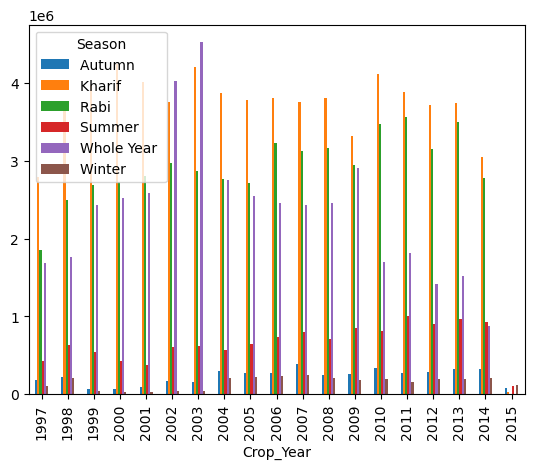

In [97]:
new_df1.groupby(['Crop_Year','Season'])['Production'].sum().unstack().plot(kind='bar')

<Axes: xlabel='Season'>

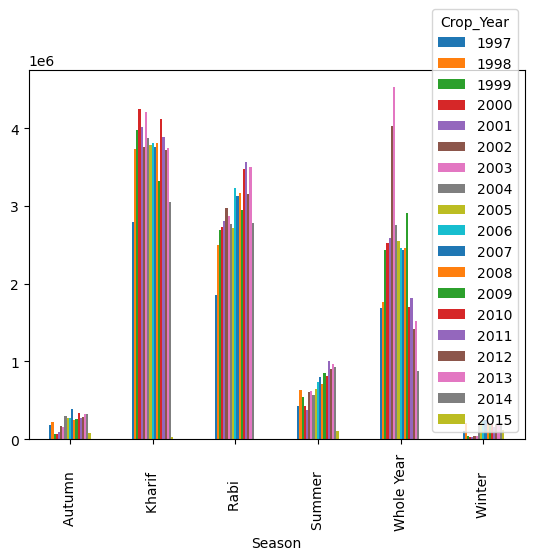

In [92]:
new_df1.groupby(['Season','Crop_Year'])['Production'].sum().unstack().plot(kind='bar')

<Axes: xlabel='Season,Crop_Year'>

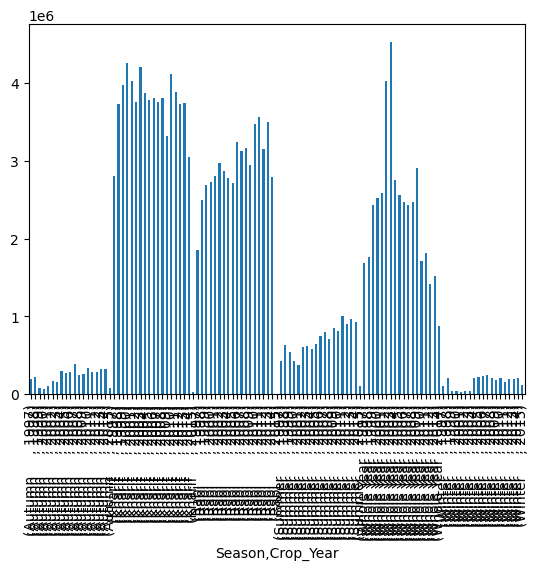

In [90]:
new_df1.groupby(['Season','Crop_Year'])['Production'].sum().plot(kind='bar')

<Axes: xlabel='Season'>

<Figure size 2000x600 with 0 Axes>

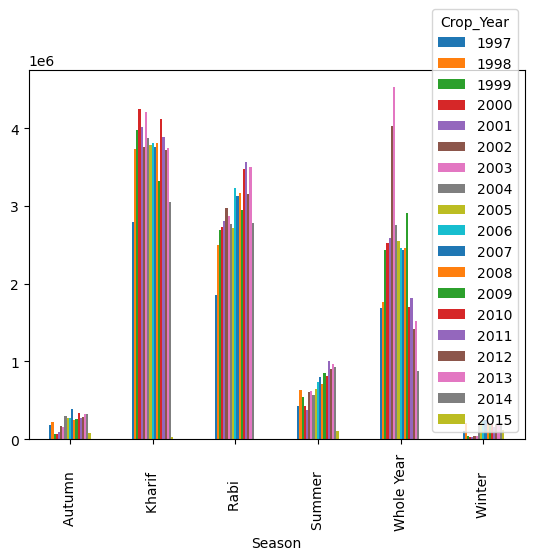

In [115]:
plt.figure(figsize=(20,6))
new_df1.groupby(['Season','Crop_Year'])['Production'].sum().unstack().plot(kind='bar')


In [113]:
new_df1[new_df1['Season']=='Rabi']

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [ ]:
ll

In [116]:
new_df1.groupby(['Season','Crop_Year'])['Production'].sum()

Season       Crop_Year
Autumn       1997         187949.000000
             1998         223711.629778
             1999          72278.000000
             2000          64053.000000
             2001          98503.000000
                              ...      
Winter       2011         157171.210000
             2012         199414.047938
             2013         191393.400000
             2014         202970.100000
             2015         118890.500000
Name: Production, Length: 113, dtype: float64

In [120]:
gs=new_df1.groupby(['Season','Crop_Year'])['Production'].sum().reset_index()
gs

,Season,Crop_Year,Production
0,Autumn,1997,187949.000000
1,Autumn,1998,223711.629778
2,Autumn,1999,72278.000000
3,Autumn,2000,64053.000000
4,Autumn,2001,98503.000000
...,...,...,...
108,Winter,2011,157171.210000
109,Winter,2012,199414.047938
110,Winter,2013,191393.400000
111,Winter,2014,202970.100000


<Axes: xlabel='Season', ylabel='Production'>

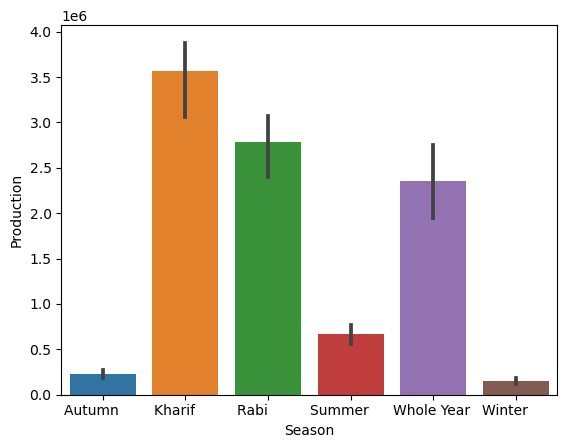

In [121]:
sns.barplot(x='Season',y='Production',data=gs)

<Axes: xlabel='Season', ylabel='Production'>

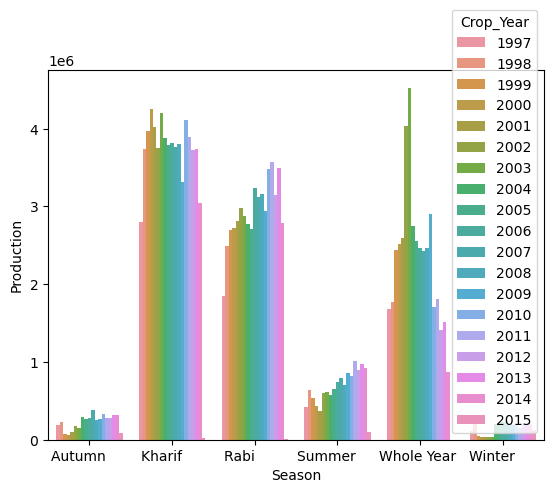

In [122]:

sns.barplot(x='Season',y='Production',data=gs,hue='Crop_Year')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Autumn     '),
  Text(1, 0, 'Kharif     '),
  Text(2, 0, 'Rabi       '),
  Text(3, 0, 'Summer     '),
  Text(4, 0, 'Whole Year '),
  Text(5, 0, 'Winter     ')])

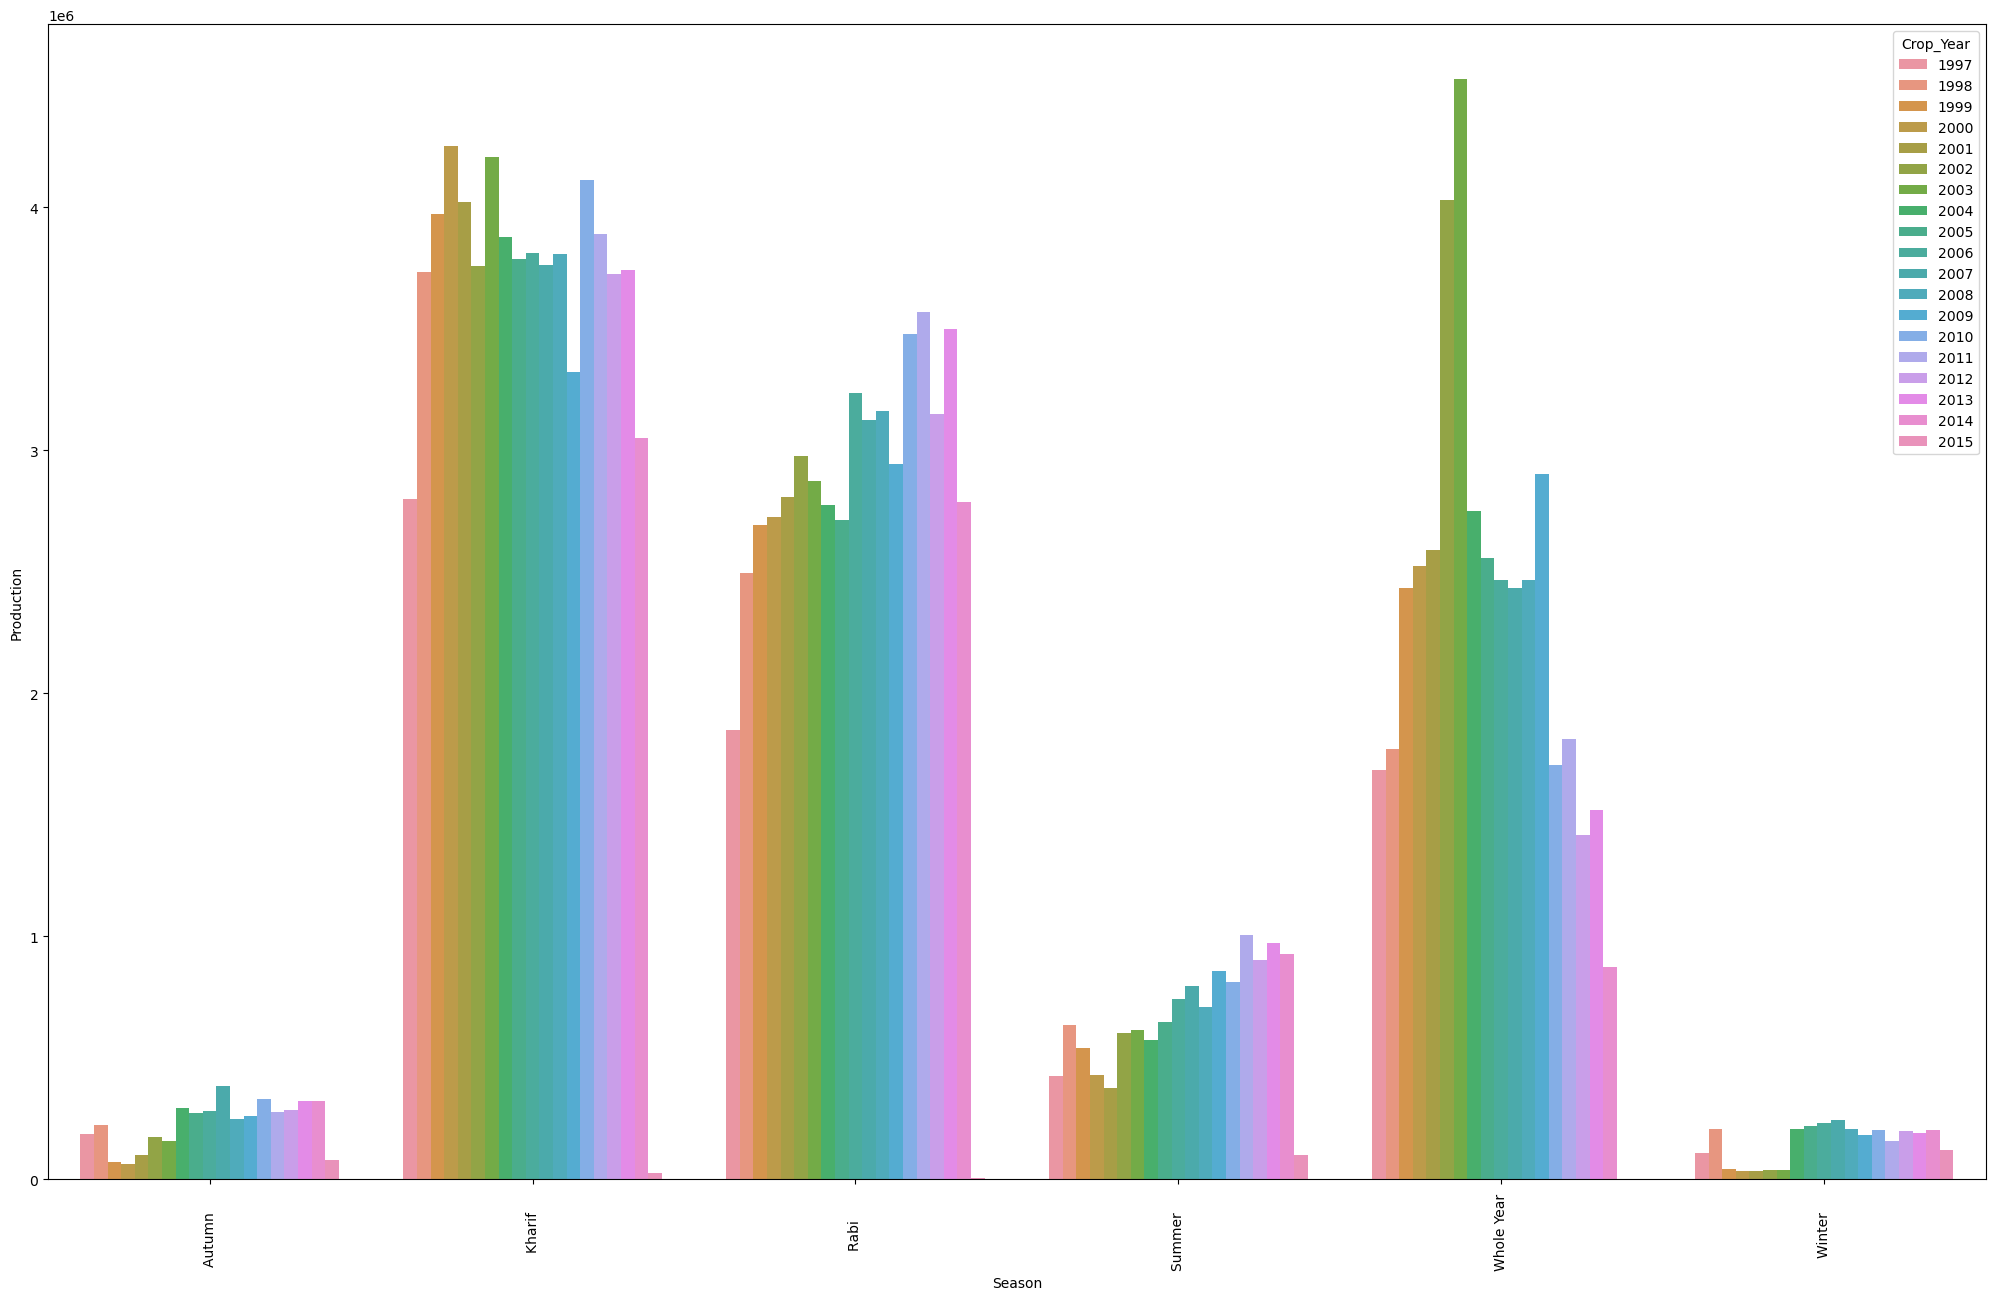

In [126]:
plt.figure(figsize=(25,15))

sns.barplot(x='Season',y='Production',data=gs,hue='Crop_Year')
plt.xticks(rotation=90)

In [199]:
new_df1['Season']=new_df1['Season'].apply(lambda x:x.strip())
new_df1['Season']

C:\Users\sahus\AppData\Local\Temp\ipykernel_19224\1470107451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Season']=new_df1['Season'].apply(lambda x:x.strip())


0             Kharif
1             Kharif
2             Kharif
3         Whole Year
4         Whole Year
             ...    
246084          Rabi
246085        Summer
246086        Summer
246087        Summer
246090        Winter
Name: Season, Length: 182503, dtype: object

In [200]:
new_df1['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

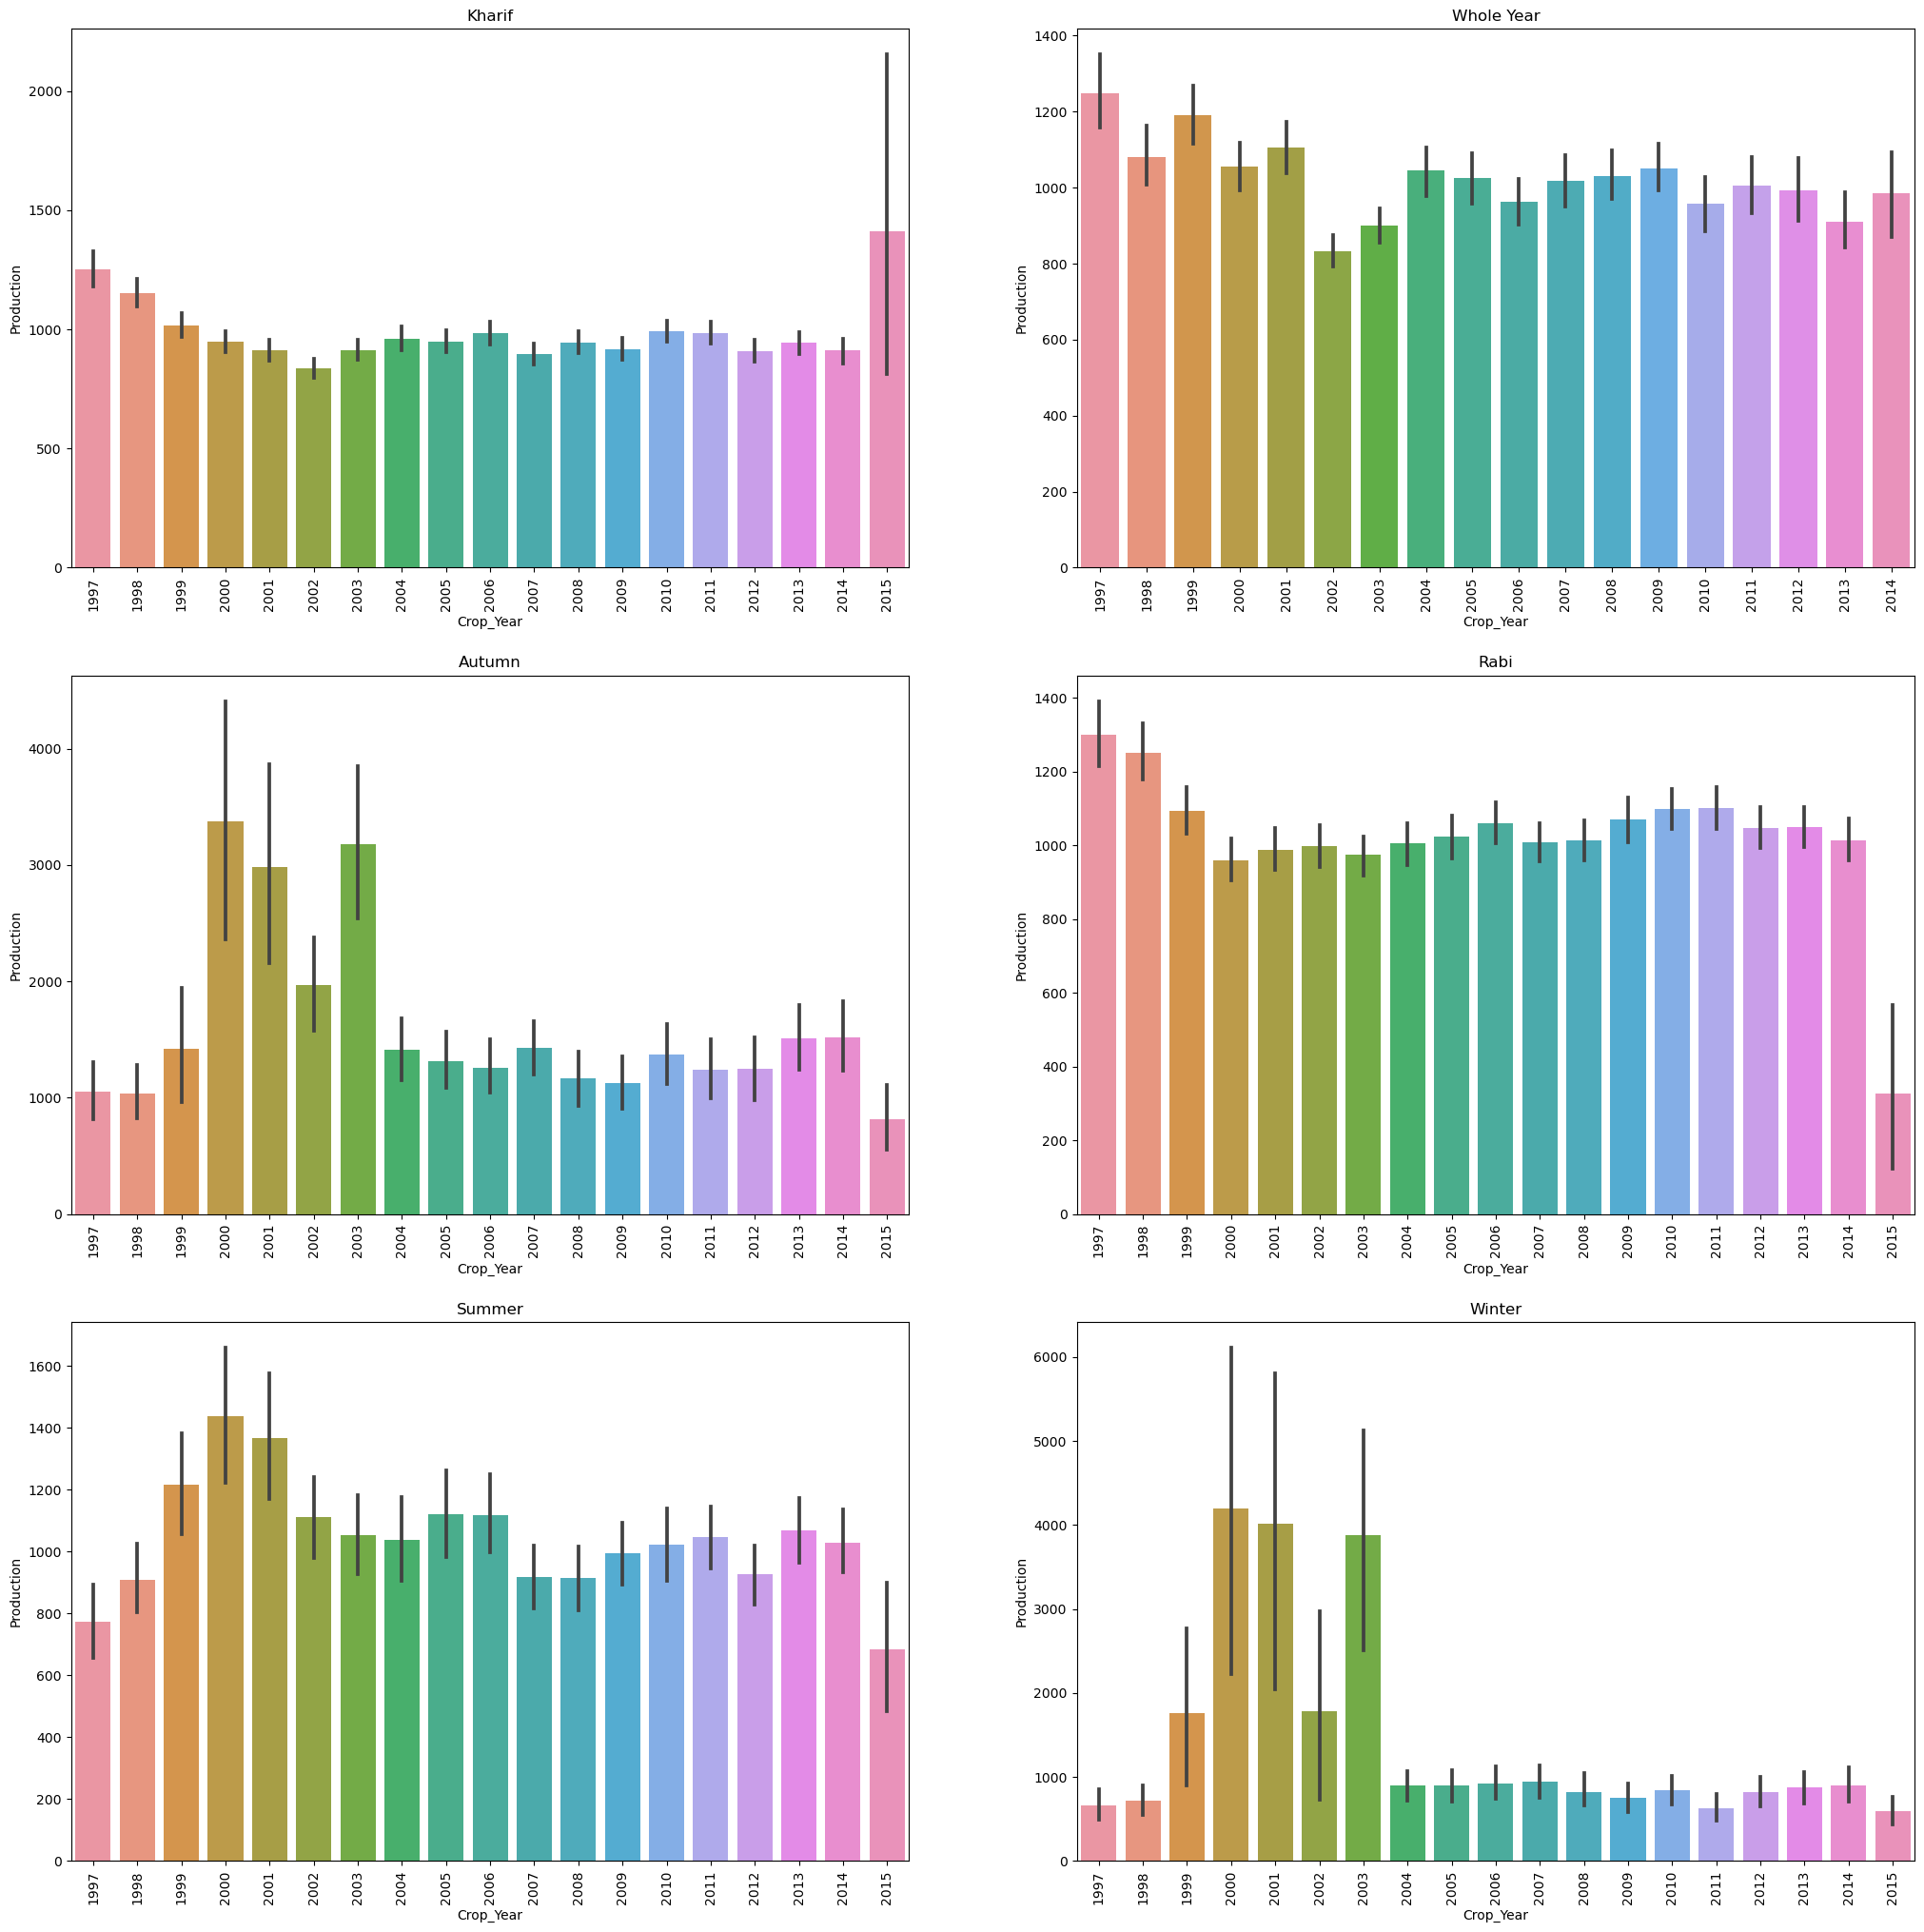

In [227]:
num=1
plt.figure(figsize=(25,25))

for i in new_df1['Season'].unique():
    plt.subplot(3,2,num)
    sns.barplot(data=new_df1[new_df1['Season']==i] ,x='Crop_Year',y='Production')
    plt.xticks(rotation=90)
    plt.title(i)
    num=num+1

In [ ]:
####### SEASON WISE YEARLY AREA

In [127]:
new_df1.groupby(['Season','Crop_Year'])['Area'].sum()

Season       Crop_Year
Autumn       1997         221136.00
             1998         216193.00
             1999          62933.00
             2000          55677.00
             2001          70864.00
                            ...    
Winter       2011         187027.87
             2012         214836.00
             2013         184159.00
             2014         168637.00
             2015         127522.00
Name: Area, Length: 113, dtype: float64

In [130]:
hh=new_df1.groupby(['Season','Crop_Year'])['Area'].sum().reset_index()
hh

,Season,Crop_Year,Area
0,Autumn,1997,221136.00
1,Autumn,1998,216193.00
2,Autumn,1999,62933.00
3,Autumn,2000,55677.00
4,Autumn,2001,70864.00
...,...,...,...
108,Winter,2011,187027.87
109,Winter,2012,214836.00
110,Winter,2013,184159.00
111,Winter,2014,168637.00


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Autumn     '),
  Text(1, 0, 'Kharif     '),
  Text(2, 0, 'Rabi       '),
  Text(3, 0, 'Summer     '),
  Text(4, 0, 'Whole Year '),
  Text(5, 0, 'Winter     ')])

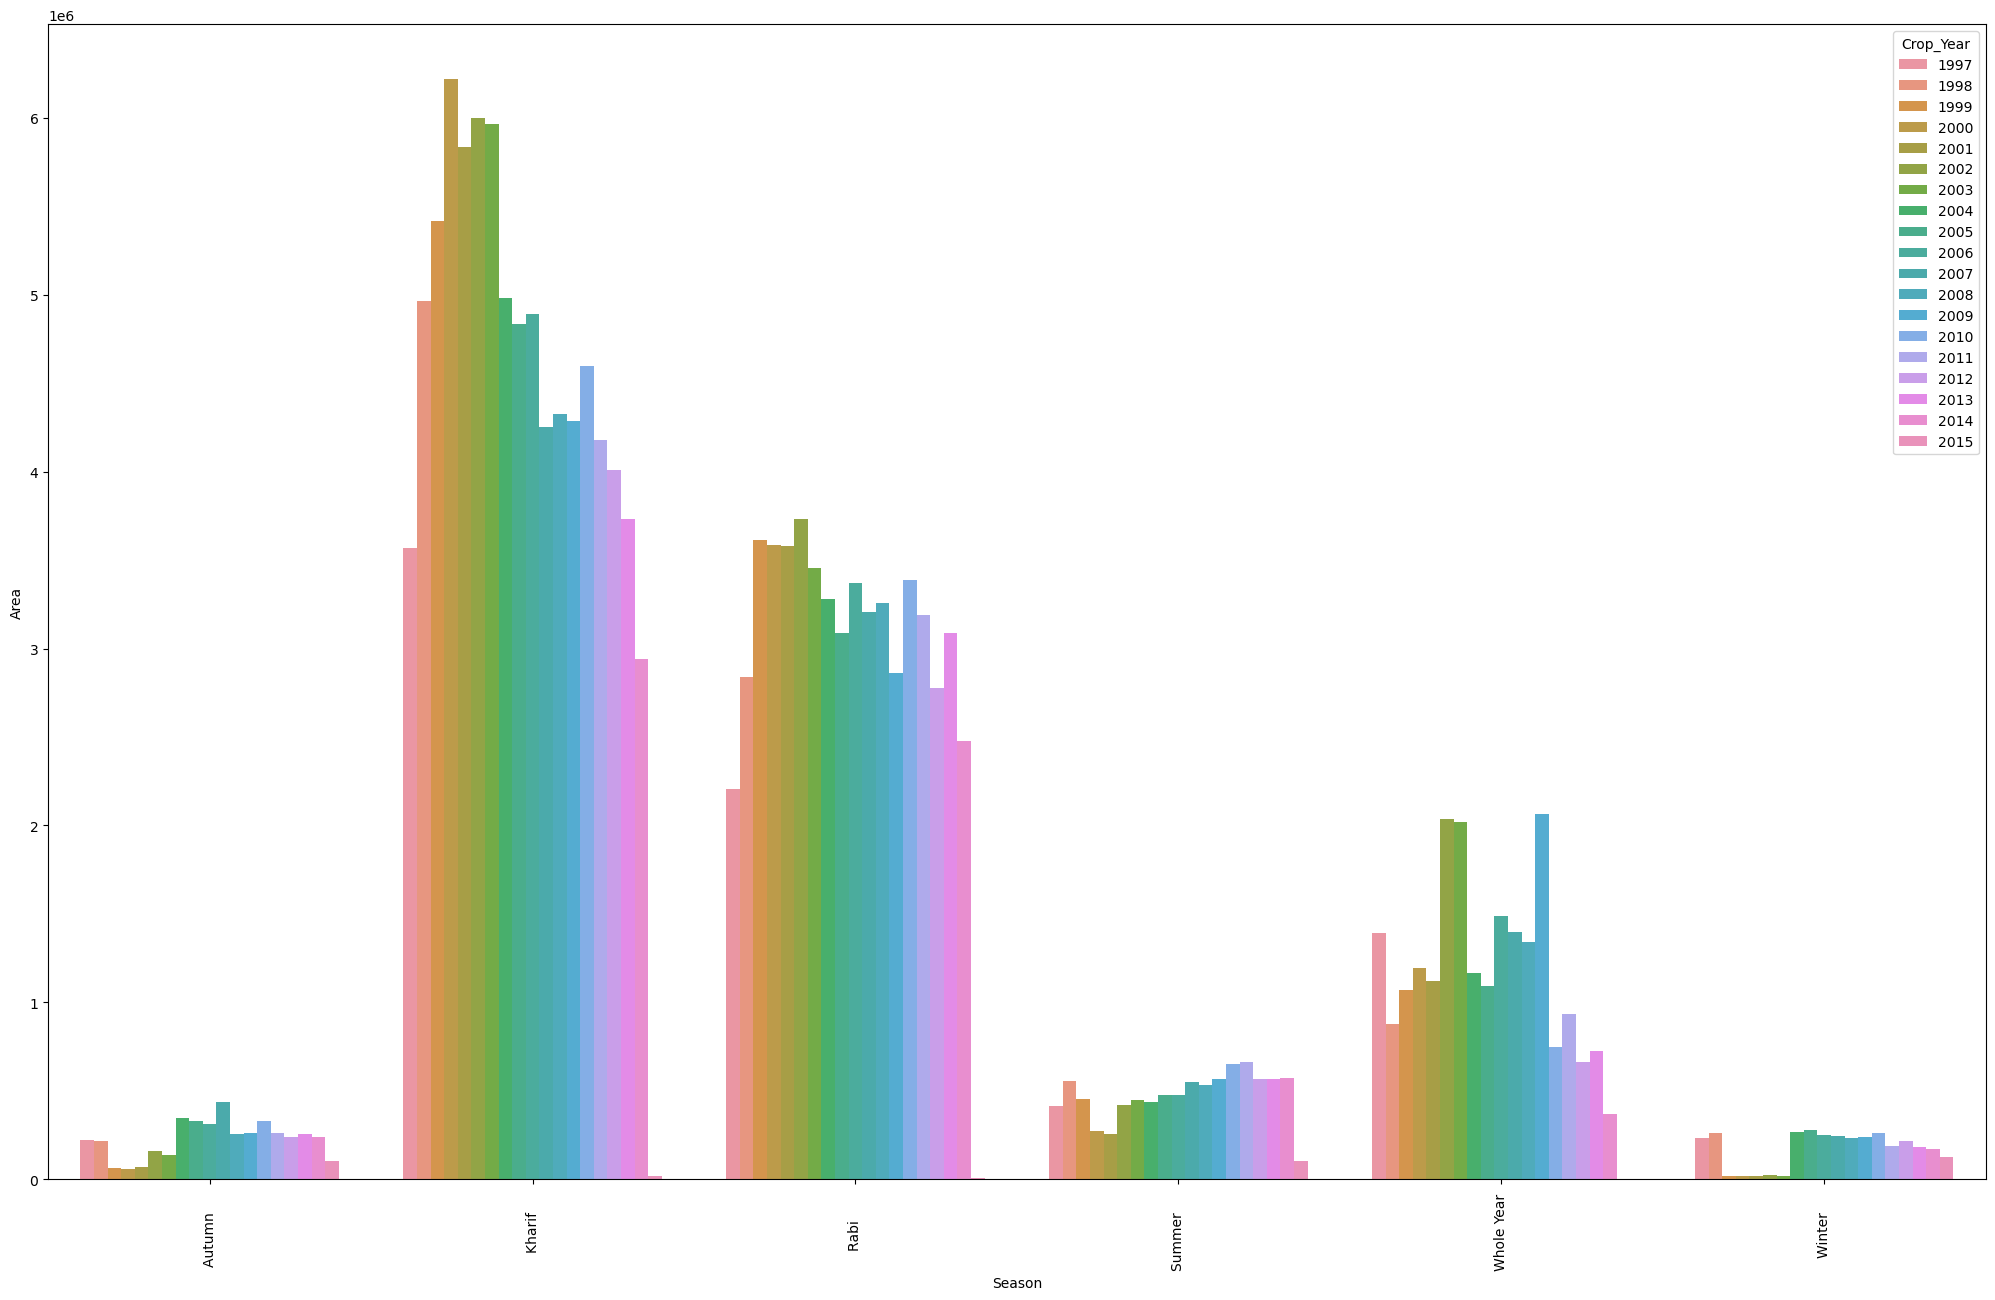

In [139]:
plt.figure(figsize=(25,15))

sns.barplot(x='Season',y='Area',data=hh,hue='Crop_Year')
plt.xticks(rotation=90)

In [ ]:
# or in better way

In [206]:
new_df1['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

C:\Users\sahus\AppData\Local\Temp\ipykernel_24272\3168356228.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=new_df1[new_df1['Season']==i] ,x='Crop_Year',y='Area',ci=False)
C:\Users\sahus\AppData\Local\Temp\ipykernel_24272\3168356228.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=new_df1[new_df1['Season']==i] ,x='Crop_Year',y='Area',ci=False)
C:\Users\sahus\AppData\Local\Temp\ipykernel_24272\3168356228.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=new_df1[new_df1['Season']==i] ,x='Crop_Year',y='Area',ci=False)
C:\Users\sahus\AppData\Local\Temp\ipykernel_24272\3168356228.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=new_df1[new_df1['Season']==i] ,x='Crop_Year',y='Area',ci

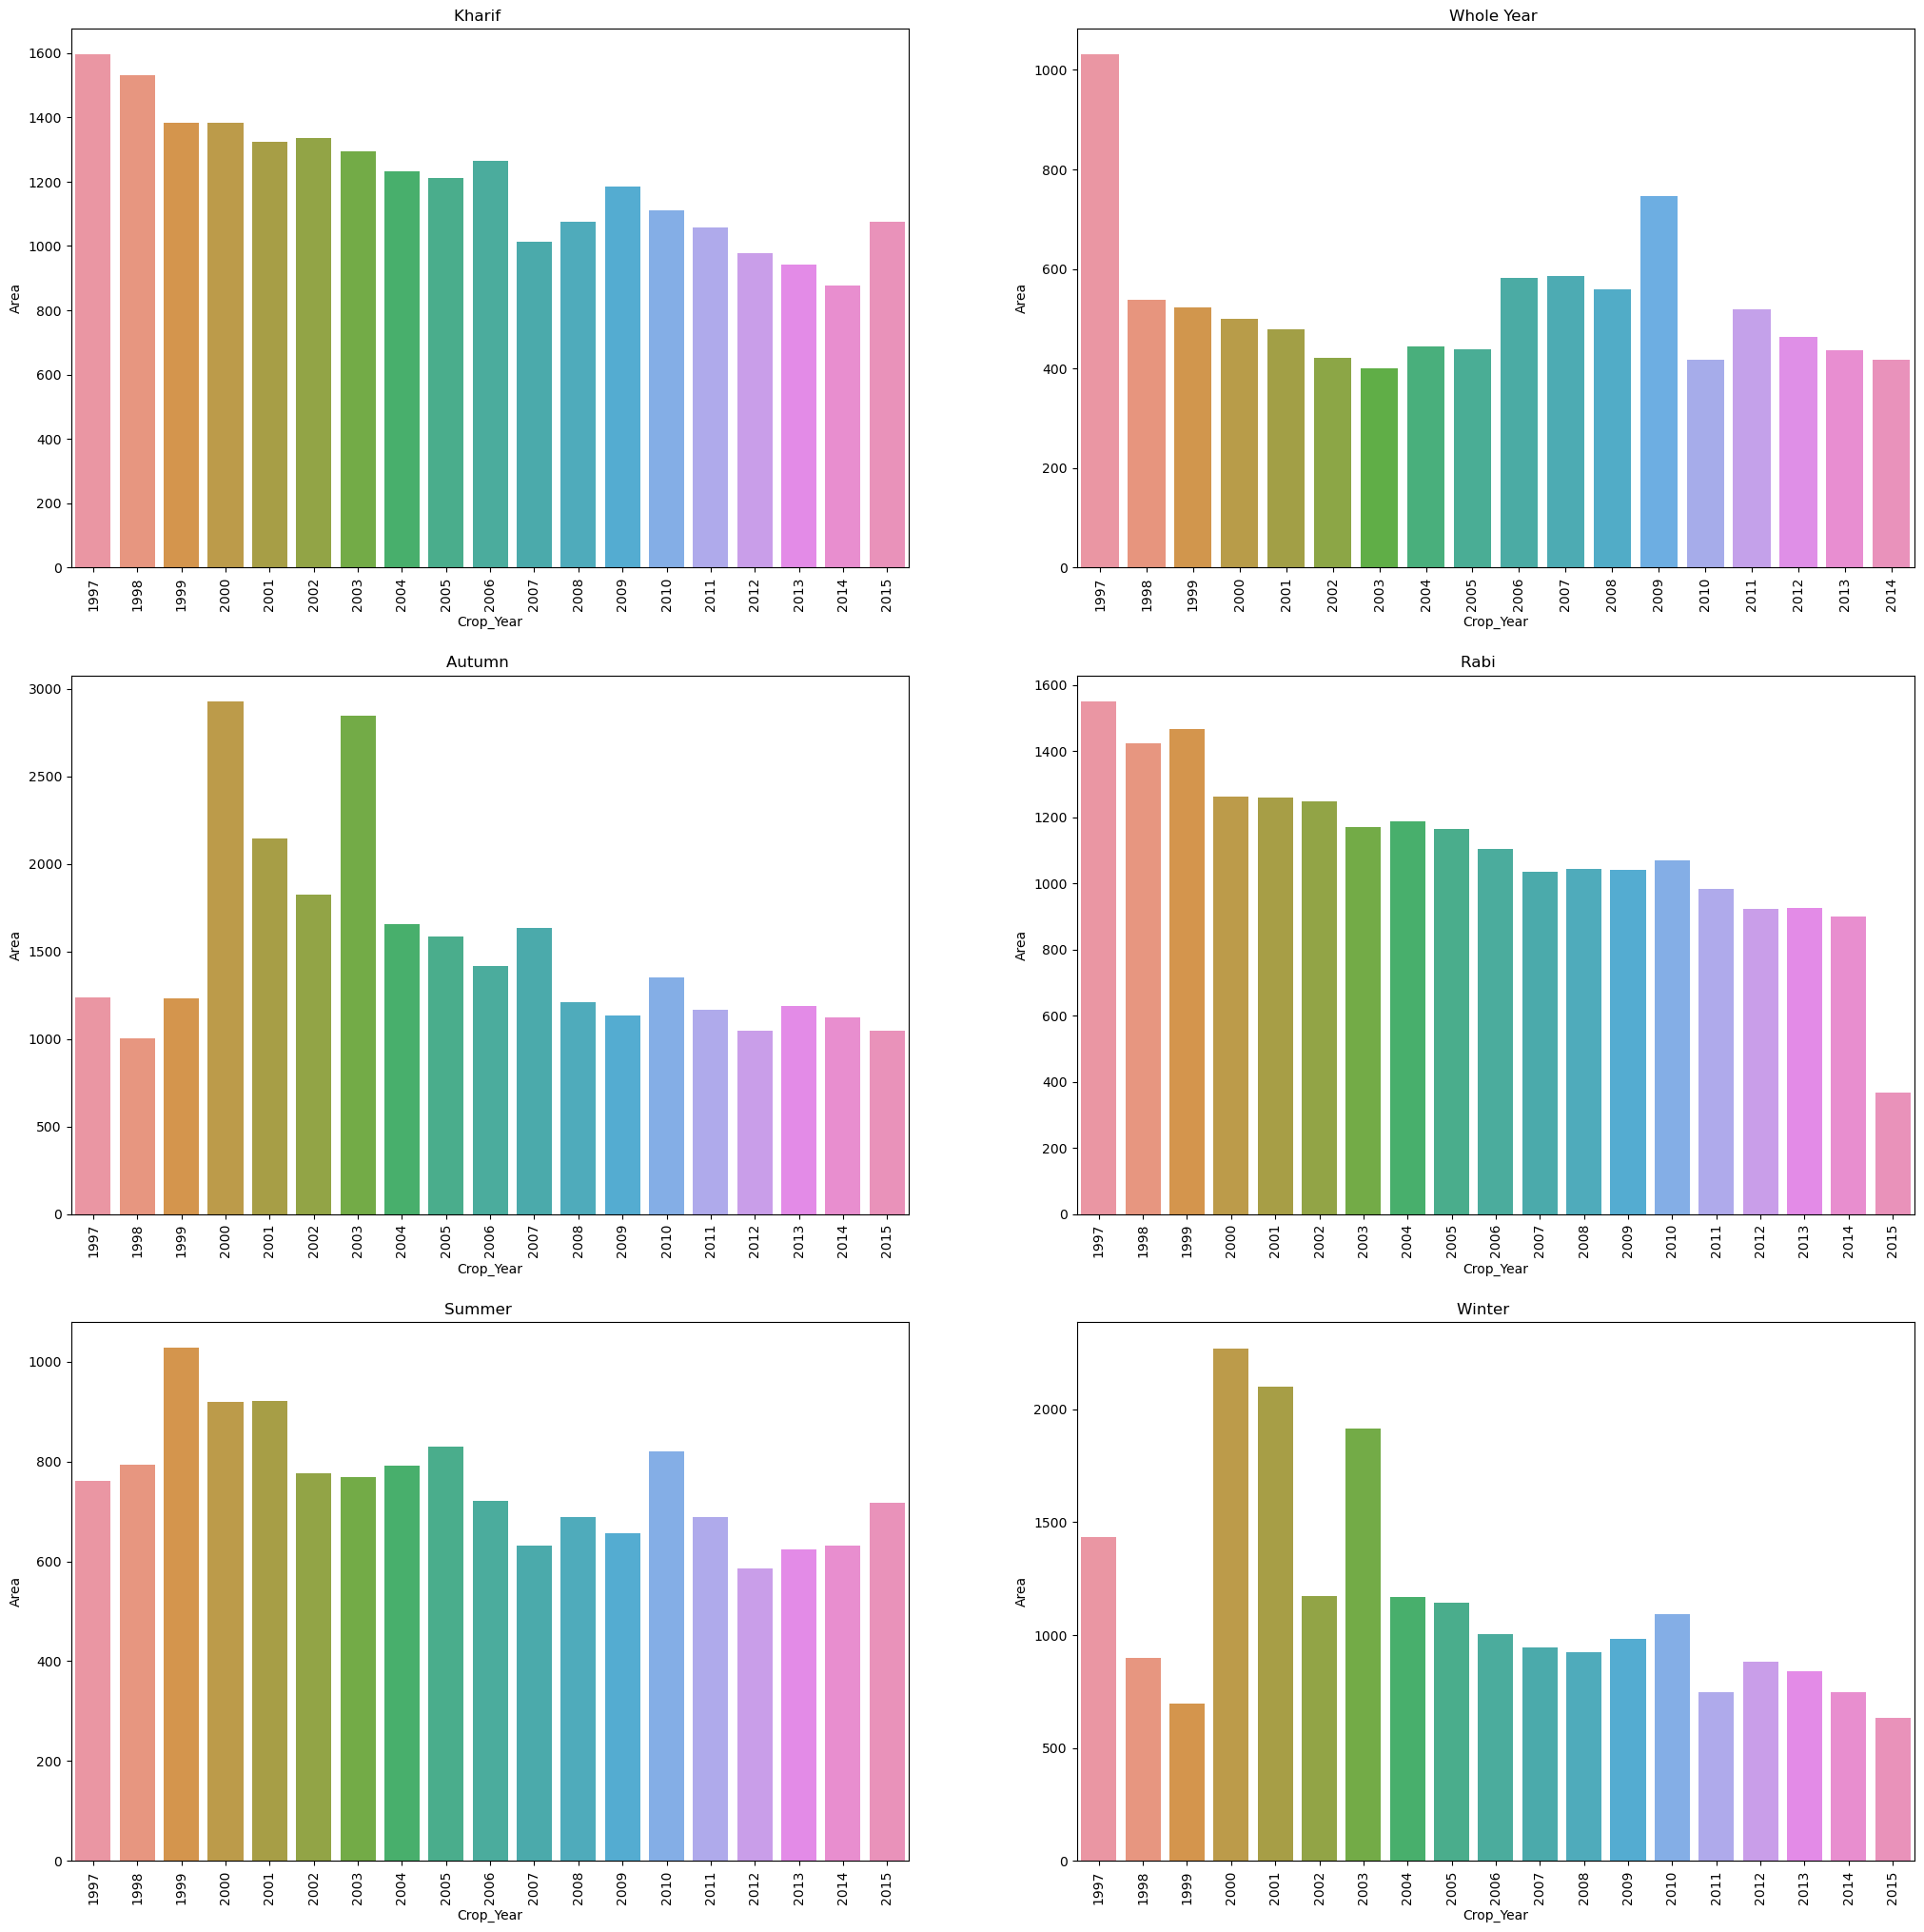

In [62]:
num=1
plt.figure(figsize=(25,25))
for i in new_df1['Season'].unique():
    plt.subplot(3,2,num)
    sns.barplot(data=new_df1[new_df1['Season']==i] ,x='Crop_Year',y='Area',ci=False)
    plt.xticks(rotation=90)
    plt.title(i)
    num=num+1

In [ ]:
KEY INSIGHTS

In [ ]:
UNIVARIATE ANALYSIS(single column)
-->The data in AREA is highly skewed (Right skewed) as different state has variation in agricultural land.
-->The data in PRODUCTION is highly skewed as different state has variation in agricultural land.
-->The district TUMKAR has maximum count (in dataset repeted most of the time).
-->The district MUMBAI has minimum count (in dataset repeted most of the time).
-->In crop the MOONG (green gram)has maximum count.
-->The season kharif has maximum count.

BIVARIATE and MULTIVARIATE ANALYSIS
-->The PRODUCTION is  correlated with agricultural AREA.
-->From year 1997 to 2015 almost the AREA is decreasing as year is increasing.
-->The PRODUCTION was higest in 1997 and lowest in 2015.
-->The Area was higest in 1997 and lowest in 2015.
-->The production of crop is maximum in AUTUMN SEASON.
-->The agricutural area is maximum in AUTUMN SEASON.
-->The production of JUTE and mesta is maximum.
-->The crop RABI agriculutural area is decreasing by the year.
-->The WHOLE YEAR season has shown almost equal production in every year.
-->The last year in the data set that is 2015 there has been increment in the PRODUCTION of crop in KHARIF SEASON and SUMMER SEASON 
   compared to last 3 years.
